In [ ]:
# 2.3.1. Загрузка данных
# Импорт необходимых библиотек и загрузка трёх выбранных датасетов из папки data/

import pandas as pd  # Для работы с табличными данными

# Загружаем датасеты по относительным путям
df_01 = pd.read_csv('data/S07-hw-dataset-01.csv')   # Датасет с разными шкалами и шумовыми признаками
df_02 = pd.read_csv('data/S07-hw-dataset-02.csv')   # Датасет с нелинейной структурой, выбросами и шумовым признаком
df_04 = pd.read_csv('data/S07-hw-dataset-04.csv')   # Датасет с высокой размерностью, категориальными признаками и пропусками

In [7]:
# 2.3.1. Первичный анализ — Dataset 01 (S07-hw-dataset-01.csv)
# Выполняем: head(), info(), describe(), проверку пропусков, типы признаков
# Также выделяем sample_id и матрицу признаков X

print("=== Первичный анализ: Dataset 01 ===")

# Первые строки для ознакомления
print("head()")
display(df_01.head())

# Общая информация о столбцах и количестве значений
print("\ninfo()")
df_01.info()

# Базовые статистики по числовым признакам
print("\ndescribe()")
display(df_01.describe())

# Проверка пропущенных значений
print("\nПропуски (количество)")
display(df_01.isnull().sum())

print("\nПропуски (доля)")
display(df_01.isnull().mean())

# Типы данных столбцов
print("\nТипы столбцов")
display(df_01.dtypes)

# Выделяем идентификаторы и признаки для дальнейшей работы
sample_id_01 = df_01['sample_id']          # Сохраняем отдельно для сохранения результатов кластеризации
X_01 = df_01.drop('sample_id', axis=1)     # X — только признаки

print(f"\nФорма матрицы признаков X_01: {X_01.shape}")
print("Вывод: все признаки числовые, пропусков нет, сильный разброс шкал (особенно заметно по f02).")

=== Первичный анализ: Dataset 01 ===
head()


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213



info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB

describe()


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745



Пропуски (количество)


sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64


Пропуски (доля)


sample_id    0.0
f01          0.0
f02          0.0
f03          0.0
f04          0.0
f05          0.0
f06          0.0
f07          0.0
f08          0.0
dtype: float64


Типы столбцов


sample_id      int64
f01          float64
f02          float64
f03          float64
f04          float64
f05          float64
f06          float64
f07          float64
f08          float64
dtype: object


Форма матрицы признаков X_01: (12000, 8)
Вывод: все признаки числовые, пропусков нет, сильный разброс шкал (особенно заметно по f02).


In [8]:
# 2.3.1. Первичный анализ — Dataset 02 (S07-hw-dataset-02.csv)
# Выполняем: head(), info(), describe(), проверку пропусков, типы признаков
# Также выделяем sample_id и матрицу признаков X

print("=== Первичный анализ: Dataset 02 ===")

print("head()")
display(df_02.head())

print("\ninfo()")
df_02.info()

print("\ndescribe()")
display(df_02.describe())

print("\nПропуски (количество)")
display(df_02.isnull().sum())

print("\nПропуски (доля)")
display(df_02.isnull().mean())

print("\nТипы столбцов")
display(df_02.dtypes)

sample_id_02 = df_02['sample_id']
X_02 = df_02.drop('sample_id', axis=1)

print(f"\nФорма матрицы признаков X_02: {X_02.shape}")
print("Вывод: все признаки числовые, пропусков нет, z_noise — явный шумовой признак с большим разбросом.")

=== Первичный анализ: Dataset 02 ===
head()


,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472



info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB

describe()


,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076



Пропуски (количество)


sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64


Пропуски (доля)


sample_id    0.0
x1           0.0
x2           0.0
z_noise      0.0
dtype: float64


Типы столбцов


sample_id      int64
x1           float64
x2           float64
z_noise      float64
dtype: object


Форма матрицы признаков X_02: (8000, 3)
Вывод: все признаки числовые, пропусков нет, z_noise — явный шумовой признак с большим разбросом.


In [9]:
# 2.3.1. Первичный анализ — Dataset 04 (S07-hw-dataset-04.csv)
# Выполняем: head(), info(), describe(), проверку пропусков, типы признаков
# Также выделяем sample_id и матрицу признаков X

print("=== Первичный анализ: Dataset 04 ===")

print("head()")
display(df_04.head())

print("\ninfo()")
df_04.info()

# describe с include='all' для отображения статистики и по категориальным признакам
print("\ndescribe() (включая категориальные)")
display(df_04.describe(include='all'))

print("\nПропуски (количество)")
display(df_04.isnull().sum())

print("\nПропуски (доля)")
display(df_04.isnull().mean())

print("\nТипы столбцов")
display(df_04.dtypes)

sample_id_04 = df_04['sample_id']
X_04 = df_04.drop('sample_id', axis=1)

print(f"\nФорма матрицы признаков X_04: {X_04.shape}")
print("Вывод: два категориальных признака (cat_a, cat_b), 30 числовых, пропуски в числовых столбцах (~1.7-2.2%).")

=== Первичный анализ: Dataset 04 ===
head()


,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676



info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20 

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
count,10000.00000,10000,10000,9826.000000,9811.000000,9801.000000,9808.000000,9799.000000,9817.000000,9796.000000,...,9785.000000,9804.000000,9829.000000,9793.000000,9815.000000,9776.000000,9803.000000,9789.000000,9798.000000,9805.000000
unique,NaN,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1692,1682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4999.50000,NaN,NaN,17.348435,-2.057620,7.908302,14.269157,0.900590,5.832787,-0.840875,...,-12.716502,-0.506241,8.360226,0.026943,0.039297,-0.037155,0.028512,-0.030738,-0.018685,-0.030254
std,2886.89568,NaN,NaN,22.578551,19.043410,25.637807,18.815319,20.981294,13.221646,26.583849,...,37.290305,14.336833,17.754646,26.121335,3.009995,3.020813,3.028106,3.000090,3.014209,3.014573
min,0.00000,NaN,NaN,-22.437090,-37.546998,-38.136412,-23.374316,-45.914070,-20.650038,-60.297304,...,-89.640783,-35.102360,-25.014050,-49.423300,-11.225848,-14.446922,-10.840777,-11.679259,-11.437909,-11.491223
25%,2499.75000,NaN,NaN,-3.975438,-14.200552,-8.591513,-1.223379,-5.086756,-4.532057,-13.554720,...,-41.284671,-11.563652,-2.123576,-19.425213,-1.973213,-2.082235,-2.007628,-2.074500,-2.051778,-2.074396
50%,4999.50000,NaN,NaN,22.042807,-6.532183,0.350400,10.069142,2.413111,7.391953,-2.429024,...,-1.145681,2.491416,6.691365,-8.464171,0.037806,-0.033336,0.031588,-0.043127,-0.015441,-0.015903
75%,7499.25000,NaN,NaN,37.535647,2.092197,30.725630,29.807101,18.398883,13.033076,16.095731,...,18.916379,11.903004,14.939690,16.861978,2.048648,2.019027,2.056870,1.980217,2.013964,2.031215



Пропуски (количество)


sample_id      0
cat_a          0
cat_b          0
n01          174
n02          189
n03          199
n04          192
n05          201
n06          183
n07          204
n08          194
n09          195
n10          189
n11          204
n12          202
n13          197
n14          198
n15          186
n16          191
n17          212
n18          212
n19          187
n20          203
n21          215
n22          196
n23          171
n24          207
n25          185
n26          224
n27          197
n28          211
n29          202
n30          195
dtype: int64


Пропуски (доля)


sample_id    0.0000
cat_a        0.0000
cat_b        0.0000
n01          0.0174
n02          0.0189
n03          0.0199
n04          0.0192
n05          0.0201
n06          0.0183
n07          0.0204
n08          0.0194
n09          0.0195
n10          0.0189
n11          0.0204
n12          0.0202
n13          0.0197
n14          0.0198
n15          0.0186
n16          0.0191
n17          0.0212
n18          0.0212
n19          0.0187
n20          0.0203
n21          0.0215
n22          0.0196
n23          0.0171
n24          0.0207
n25          0.0185
n26          0.0224
n27          0.0197
n28          0.0211
n29          0.0202
n30          0.0195
dtype: float64


Типы столбцов


sample_id      int64
cat_a         object
cat_b         object
n01          float64
n02          float64
n03          float64
n04          float64
n05          float64
n06          float64
n07          float64
n08          float64
n09          float64
n10          float64
n11          float64
n12          float64
n13          float64
n14          float64
n15          float64
n16          float64
n17          float64
n18          float64
n19          float64
n20          float64
n21          float64
n22          float64
n23          float64
n24          float64
n25          float64
n26          float64
n27          float64
n28          float64
n29          float64
n30          float64
dtype: object


Форма матрицы признаков X_04: (10000, 32)
Вывод: два категориальных признака (cat_a, cat_b), 30 числовых, пропуски в числовых столбцах (~1.7-2.2%).


In [10]:
# 2.3.2. Препроцессинг
# Импорт необходимых классов из scikit-learn для создания пайплайнов препроцессинга
# Используем Pipeline и ColumnTransformer для явного и воспроизводимого препроцессинга

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer  # Для обработки пропусков (импутация средним)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:
# 2.3.2. Препроцессинг для Dataset 01 (S07-hw-dataset-01.csv)
# Только числовые признаки, пропусков нет → только StandardScaler
# Применяется одинаково ко всем моделям этого датасета

# Все признаки (кроме sample_id) числовые
numeric_features_01 = X_01.columns.tolist()

# Пайплайн: масштабирование
preprocess_01 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_01)
    ],
    remainder='passthrough'  # На всякий случай, хотя remainder пустой
)

print("Препроцессинг для Dataset 01 готов: только StandardScaler для всех признаков.")
print("Обоснование: разные шкалы (видно из describe), пропусков нет.")

Препроцессинг для Dataset 01 готов: только StandardScaler для всех признаков.
Обоснование: разные шкалы (видно из describe), пропусков нет.


In [12]:
# 2.3.2. Препроцессинг для Dataset 02 (S07-hw-dataset-02.csv)
# Только числовые признаки, пропусков нет → только StandardScaler
# Применяется одинаково ко всем моделям этого датасета

numeric_features_02 = X_02.columns.tolist()

preprocess_02 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_02)
    ],
    remainder='passthrough'
)

print("Препроцессинг для Dataset 02 готов: только StandardScaler для всех признаков.")
print("Обоснование: признаки x1, x2 и z_noise в разных шкалах, особенно z_noise — сильный разброс.")

Препроцессинг для Dataset 02 готов: только StandardScaler для всех признаков.
Обоснование: признаки x1, x2 и z_noise в разных шкалах, особенно z_noise — сильный разброс.


In [14]:
# 2.3.2. Препроцессинг для Dataset 04 (S07-hw-dataset-04.csv)
# Есть числовые признаки (с пропусками) и категориальные
# Решение: включаем категориальные через OneHotEncoder (чтобы не терять информацию)
# Числовые: импутация средним + StandardScaler
# Применяется одинаково ко всем моделям этого датасета

# Определяем типы признаков
numeric_features_04 = X_04.select_dtypes(include=['float64']).columns.tolist()
categorical_features_04 = X_04.select_dtypes(include=['object']).columns.tolist()  # cat_a, cat_b

print(f"Числовые признаки ({len(numeric_features_04)}): {numeric_features_04}")
print(f"Категориальные признаки ({len(categorical_features_04)}): {categorical_features_04}")

# Пайплайн для числовых: импутация + масштабирование
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Обработка пропусков средним
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных: OneHotEncoding
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sparse=False для удобства
])

# Общий ColumnTransformer
preprocess_04 = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features_04),
        ('cat', categorical_pipeline, categorical_features_04)
    ],
    remainder='drop'  # Ничего не остаётся
)

Числовые признаки (30): ['n01', 'n02', 'n03', 'n04', 'n05', 'n06', 'n07', 'n08', 'n09', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30']
Категориальные признаки (2): ['cat_a', 'cat_b']


In [15]:
# 2.3.3. Модели недели 7
# Импорт необходимых классов для кластеризации, подбора параметров и метрик
# Также импорт matplotlib для графиков подбора параметров

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

# Фиксируем random_state для воспроизводимости
RANDOM_STATE = 42

Подбор k для KMeans на Dataset 01 (silhouette_score)
k =  2 → silhouette = 0.5216
k =  3 → silhouette = 0.3968
k =  4 → silhouette = 0.3833
k =  5 → silhouette = 0.3548
k =  6 → silhouette = 0.3586
k =  7 → silhouette = 0.3246
k =  8 → silhouette = 0.2689
k =  9 → silhouette = 0.2534
k = 10 → silhouette = 0.2629
k = 11 → silhouette = 0.2659
k = 12 → silhouette = 0.2686
k = 13 → silhouette = 0.2744
k = 14 → silhouette = 0.2787
k = 15 → silhouette = 0.2884
k = 16 → silhouette = 0.2854
k = 17 → silhouette = 0.2801
k = 18 → silhouette = 0.2745
k = 19 → silhouette = 0.2720
k = 20 → silhouette = 0.2678


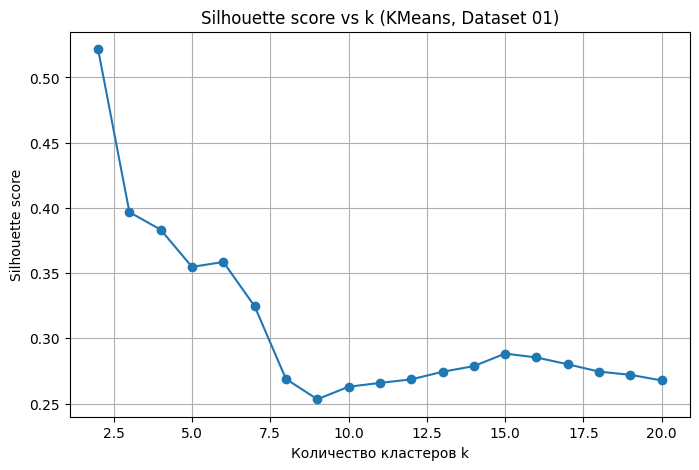


Лучшее k для KMeans: 2 (максимальный silhouette)


In [16]:
# 2.3.3. Модели для Dataset 01 (S07-hw-dataset-01.csv)
# Обязательно: KMeans с подбором k (2..20), график silhouette vs k
# На выбор: AgglomerativeClustering (подбор k, сравнение 2 linkage: ward и complete)

# Сначала применяем препроцессинг и получаем подготовленные данные
X_prep_01 = preprocess_01.fit_transform(X_01)

# Подбор k для KMeans: диапазон 2..20, фиксируем random_state и n_init
ks = range(2, 21)
silhouette_scores_kmeans_01 = []

print("Подбор k для KMeans на Dataset 01 (silhouette_score)")

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = kmeans.fit_predict(X_prep_01)
    sil = silhouette_score(X_prep_01, labels)
    silhouette_scores_kmeans_01.append(sil)
    print(f"k = {k:2d} → silhouette = {sil:.4f}")

# График подбора k
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores_kmeans_01, marker='o')
plt.title('Silhouette score vs k (KMeans, Dataset 01)')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k_dataset01_kmeans.png')
plt.show()

# Выбираем оптимальное k (максимум silhouette)
best_k_01 = ks[np.argmax(silhouette_scores_kmeans_01)]
print(f"\nЛучшее k для KMeans: {best_k_01} (максимальный silhouette)")


Подбор k для AgglomerativeClustering на Dataset 01
k =  2 → ward: 0.5216, complete: 0.5216
k =  3 → ward: 0.3968, complete: 0.1993
k =  4 → ward: 0.3832, complete: 0.2067
k =  5 → ward: 0.3459, complete: 0.1897
k =  6 → ward: 0.3316, complete: 0.1043
k =  7 → ward: 0.3187, complete: 0.0993
k =  8 → ward: 0.3299, complete: 0.1006
k =  9 → ward: 0.3103, complete: 0.0974
k = 10 → ward: 0.2421, complete: 0.0874
k = 11 → ward: 0.2368, complete: 0.1232
k = 12 → ward: 0.2284, complete: 0.1152
k = 13 → ward: 0.2189, complete: 0.1159
k = 14 → ward: 0.2121, complete: 0.1087
k = 15 → ward: 0.2123, complete: 0.1075
k = 16 → ward: 0.2144, complete: 0.1021
k = 17 → ward: 0.2143, complete: 0.1059
k = 18 → ward: 0.2132, complete: 0.1298
k = 19 → ward: 0.2144, complete: 0.1408
k = 20 → ward: 0.2157, complete: 0.1564


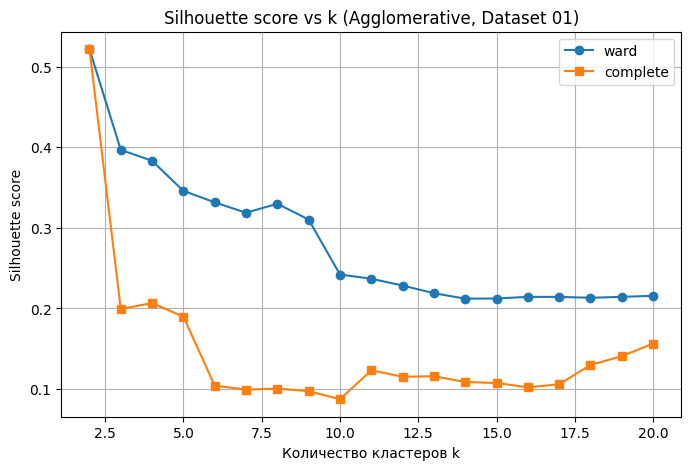


Лучшее k для Agglomerative (ward): 2


In [17]:
# 2.3.3. Продолжение: AgglomerativeClustering для Dataset 01
# Сравниваем два linkage: 'ward' и 'complete', подбираем k в том же диапазоне

silhouette_ward_01 = []
silhouette_complete_01 = []

print("\nПодбор k для AgglomerativeClustering на Dataset 01")

for k in ks:
    # Ward (работает только с евклидовым расстоянием)
    agg_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_ward = agg_ward.fit_predict(X_prep_01)
    sil_ward = silhouette_score(X_prep_01, labels_ward)
    silhouette_ward_01.append(sil_ward)
    
    # Complete
    agg_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels_complete = agg_complete.fit_predict(X_prep_01)
    sil_complete = silhouette_score(X_prep_01, labels_complete)
    silhouette_complete_01.append(sil_complete)
    
    print(f"k = {k:2d} → ward: {sil_ward:.4f}, complete: {sil_complete:.4f}")

# График сравнения linkage
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_ward_01, marker='o', label='ward')
plt.plot(ks, silhouette_complete_01, marker='s', label='complete')
plt.title('Silhouette score vs k (Agglomerative, Dataset 01)')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette score')
plt.legend()
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k_dataset01_agglomerative.png')
plt.show()

# Лучшее для Agglomerative (ward обычно лучше для шарообразных кластеров)
best_k_agg_01 = ks[np.argmax(silhouette_ward_01)]
print(f"\nЛучшее k для Agglomerative (ward): {best_k_agg_01}")

Подбор k для KMeans на Dataset 02 (silhouette_score)
k =  2 → silhouette = 0.3069
k =  3 → silhouette = 0.2700
k =  4 → silhouette = 0.2515
k =  5 → silhouette = 0.2521
k =  6 → silhouette = 0.2598
k =  7 → silhouette = 0.2536
k =  8 → silhouette = 0.2523
k =  9 → silhouette = 0.2525
k = 10 → silhouette = 0.2609
k = 11 → silhouette = 0.2659
k = 12 → silhouette = 0.2636
k = 13 → silhouette = 0.2654
k = 14 → silhouette = 0.2719
k = 15 → silhouette = 0.2760
k = 16 → silhouette = 0.2839
k = 17 → silhouette = 0.2827
k = 18 → silhouette = 0.2793
k = 19 → silhouette = 0.2789
k = 20 → silhouette = 0.2814


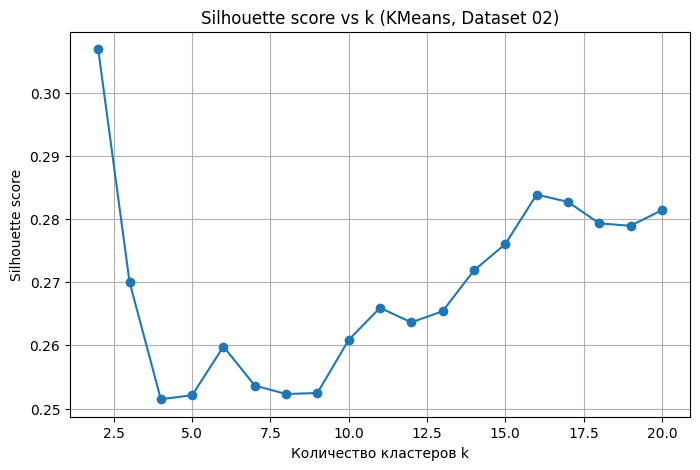


Лучшее k для KMeans: 2


In [18]:
# 2.3.3. Модели для Dataset 02 (S07-hw-dataset-02.csv)
# Обязательно: KMeans с подбором k
# На выбор: DBSCAN (подбор eps и min_samples) — идеально для нелинейной структуры

X_prep_02 = preprocess_02.fit_transform(X_02)

# KMeans — аналогично
silhouette_scores_kmeans_02 = []

print("Подбор k для KMeans на Dataset 02 (silhouette_score)")

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = kmeans.fit_predict(X_prep_02)
    sil = silhouette_score(X_prep_02, labels)
    silhouette_scores_kmeans_02.append(sil)
    print(f"k = {k:2d} → silhouette = {sil:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores_kmeans_02, marker='o')
plt.title('Silhouette score vs k (KMeans, Dataset 02)')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k_dataset02_kmeans.png')
plt.show()

best_k_02 = ks[np.argmax(silhouette_scores_kmeans_02)]
print(f"\nЛучшее k для KMeans: {best_k_02}")


Подбор параметров для DBSCAN на Dataset 02 (с исправленной обработкой метрик)


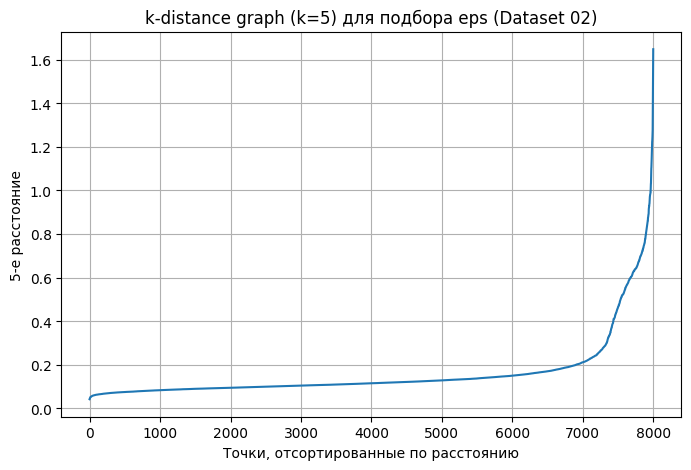

eps=0.10, min_samples=5 → clusters=178, silhouette=-0.1291, шум=0.479
eps=0.15, min_samples=5 → clusters=24, silhouette=-0.2176, шум=0.165
eps=0.20, min_samples=5 → clusters=9, silhouette=-0.0357, шум=0.102
eps=0.25, min_samples=5 → clusters=6, silhouette=0.0527, шум=0.082
eps=0.30, min_samples=5 → clusters=5, silhouette=0.0852, шум=0.072
eps=0.35, min_samples=5 → clusters=4, silhouette=0.2592, шум=0.067
eps=0.40, min_samples=5 → clusters=8, silhouette=0.1349, шум=0.062
eps=0.45, min_samples=5 → clusters=12, silhouette=-0.0756, шум=0.054
eps=0.50, min_samples=5 → clusters=14, silhouette=-0.0582, шум=0.045
eps=0.55, min_samples=5 → clusters=20, silhouette=-0.0424, шум=0.031
eps=0.10, min_samples=10 → clusters=46, silhouette=0.5812, шум=0.918
eps=0.15, min_samples=10 → clusters=16, silhouette=-0.2287, шум=0.291
eps=0.20, min_samples=10 → clusters=5, silhouette=0.1014, шум=0.147
eps=0.25, min_samples=10 → clusters=2, silhouette=0.2537, шум=0.103
eps=0.30, min_samples=10 → clusters=1, шум=

In [20]:
# 2.3.3. Продолжение: DBSCAN для Dataset 02 
# Проблема: silhouette_score требует минимум 2 кластера + хотя бы 2 точки в каждом.
# Если DBSCAN находит только 1 кластер (или все шум/1 кластер), то silhouette не вычисляется.
# Решение: добавляем проверку количества уникальных кластеров (игнорируя шум)

from sklearn.metrics import silhouette_score

# Подбор параметров: min_samples = 5..15, eps в разумном диапазоне
min_samples_range = [5, 10, 15]
eps_range = np.arange(0.1, 0.6, 0.05)  # Можно скорректировать, если нужно

best_sil_dbscan_02 = -1
best_params_dbscan_02 = None
best_labels_dbscan_02 = None
best_noise_frac = None

print("\nПодбор параметров для DBSCAN на Dataset 02 (с исправленной обработкой метрик)")

for min_s in min_samples_range:
    # k-NN расстояния для визуального подбора eps
    neigh = NearestNeighbors(n_neighbors=min_s)
    neigh.fit(X_prep_02)
    distances, _ = neigh.kneighbors(X_prep_02)
    dist_to_kth = distances[:, -1]
    sorted_dist = np.sort(dist_to_kth)
    
    # График k-distance (только один раз, для min_s=5)
    if min_s == 5:
        plt.figure(figsize=(8, 5))
        plt.plot(sorted_dist)
        plt.title('k-distance graph (k=5) для подбора eps (Dataset 02)')
        plt.ylabel(f'{min_s}-е расстояние')
        plt.xlabel('Точки, отсортированные по расстоянию')
        plt.grid(True)
        plt.savefig('artifacts/figures/k_distance_dataset02_dbscan.png')
        plt.show()
    
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(X_prep_02)
        
        # Количество уникальных кластеров (игнорируя шум = -1)
        unique_labels = set(labels)
        if -1 in unique_labels:
            unique_labels.remove(-1)
        n_clusters = len(unique_labels)
        
        noise_frac = np.mean(labels == -1)
        
        # Проверяем, можно ли считать метрику
        if n_clusters >= 2:
            # Вычисляем silhouette только на non-noise точках
            mask = labels != -1
            if np.sum(mask) >= 2:  # Должно быть хотя бы 2 точки
                sil = silhouette_score(X_prep_02[mask], labels[mask])
                print(f"eps={eps:.2f}, min_samples={min_s} → "
                      f"clusters={n_clusters}, silhouette={sil:.4f}, шум={noise_frac:.3f}")
                
                if sil > best_sil_dbscan_02:
                    best_sil_dbscan_02 = sil
                    best_params_dbscan_02 = (eps, min_s)
                    best_labels_dbscan_02 = labels
                    best_noise_frac = noise_frac
            else:
                print(f"eps={eps:.2f}, min_samples={min_s} → "
                      f"clusters={n_clusters}, слишком мало non-noise точек")
        else:
            print(f"eps={eps:.2f}, min_samples={min_s} → "
                  f"clusters={n_clusters}, шум={noise_frac:.3f} (не вычисляем silhouette)")

# Итог
if best_params_dbscan_02 is not None:
    print(f"\nЛучшие параметры DBSCAN: eps={best_params_dbscan_02[0]:.2f}, "
          f"min_samples={best_params_dbscan_02[1]}, "
          f"silhouette={best_sil_dbscan_02:.4f}, доля шума={best_noise_frac:.3f}")
else:
    print("\nНи одна комбинация DBSCAN не нашла ≥2 кластера → используем лучший KMeans.")

Подбор k для KMeans на Dataset 04 (silhouette_score)
k =  2 → silhouette = 0.2557
k =  3 → silhouette = 0.2947
k =  4 → silhouette = 0.3754
k =  5 → silhouette = 0.4480
k =  6 → silhouette = 0.4239
k =  7 → silhouette = 0.3838
k =  8 → silhouette = 0.3331
k =  9 → silhouette = 0.2687
k = 10 → silhouette = 0.1809
k = 11 → silhouette = 0.1334
k = 12 → silhouette = 0.1506
k = 13 → silhouette = 0.0766
k = 14 → silhouette = 0.0766
k = 15 → silhouette = 0.0758
k = 16 → silhouette = 0.0762
k = 17 → silhouette = 0.0738
k = 18 → silhouette = 0.0730
k = 19 → silhouette = 0.0740
k = 20 → silhouette = 0.0718


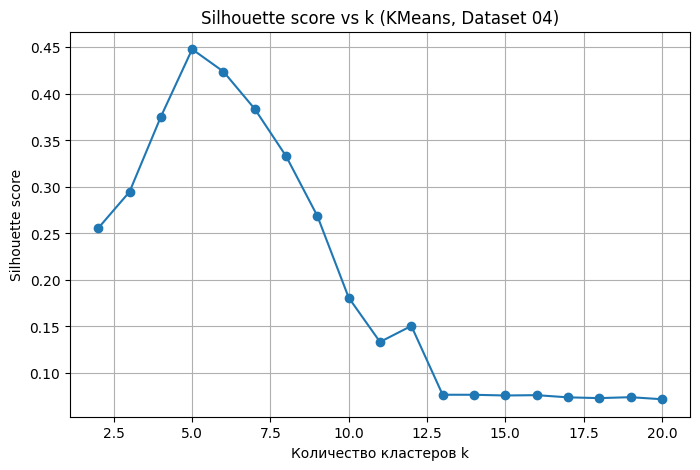


Лучшее k для KMeans: 5


In [21]:
# 2.3.3. Модели для Dataset 04 (S07-hw-dataset-04.csv)
# Обязательно: KMeans
# На выбор: AgglomerativeClustering (ward и complete)

X_prep_04 = preprocess_04.fit_transform(X_04)

# KMeans
silhouette_scores_kmeans_04 = []

print("Подбор k для KMeans на Dataset 04 (silhouette_score)")

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = kmeans.fit_predict(X_prep_04)
    sil = silhouette_score(X_prep_04, labels)
    silhouette_scores_kmeans_04.append(sil)
    print(f"k = {k:2d} → silhouette = {sil:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores_kmeans_04, marker='o')
plt.title('Silhouette score vs k (KMeans, Dataset 04)')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k_dataset04_kmeans.png')
plt.show()

best_k_04 = ks[np.argmax(silhouette_scores_kmeans_04)]
print(f"\nЛучшее k для KMeans: {best_k_04}")


Подбор k для AgglomerativeClustering на Dataset 04
k =  2 → ward: 0.2557, complete: 0.2557
k =  3 → ward: 0.2947, complete: 0.2947
k =  4 → ward: 0.3754, complete: 0.3653
k =  5 → ward: 0.4480, complete: 0.4480
k =  6 → ward: 0.4239, complete: 0.4239
k =  7 → ward: 0.3469, complete: 0.3745
k =  8 → ward: 0.2770, complete: 0.3172
k =  9 → ward: 0.2172, complete: 0.2558
k = 10 → ward: 0.1600, complete: 0.1716
k = 11 → ward: 0.0895, complete: 0.0998
k = 12 → ward: 0.0469, complete: 0.0997
k = 13 → ward: 0.0456, complete: 0.0261
k = 14 → ward: 0.0445, complete: 0.0256
k = 15 → ward: 0.0414, complete: 0.0236
k = 16 → ward: 0.0393, complete: 0.0224
k = 17 → ward: 0.0394, complete: 0.0199
k = 18 → ward: 0.0366, complete: 0.0189
k = 19 → ward: 0.0361, complete: 0.0168
k = 20 → ward: 0.0336, complete: 0.0143


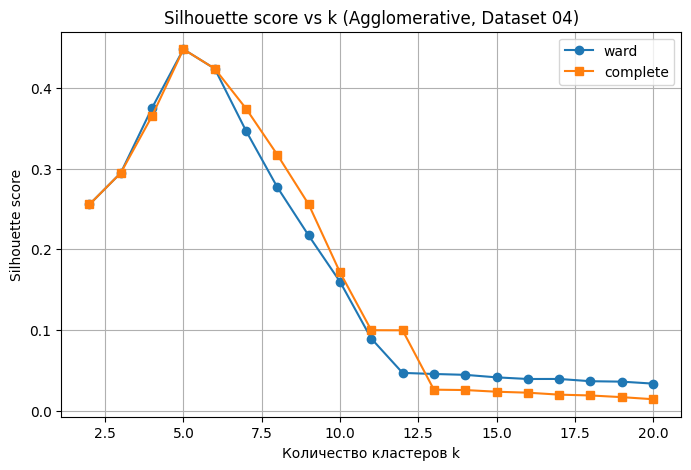


Лучшее k для Agglomerative (ward): 5


In [22]:
# 2.3.3. Продолжение: AgglomerativeClustering для Dataset 04

silhouette_ward_04 = []
silhouette_complete_04 = []

print("\nПодбор k для AgglomerativeClustering на Dataset 04")

for k in ks:
    agg_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_ward = agg_ward.fit_predict(X_prep_04)
    sil_ward = silhouette_score(X_prep_04, labels_ward)
    silhouette_ward_04.append(sil_ward)
    
    agg_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels_complete = agg_complete.fit_predict(X_prep_04)
    sil_complete = silhouette_score(X_prep_04, labels_complete)
    silhouette_complete_04.append(sil_complete)
    
    print(f"k = {k:2d} → ward: {sil_ward:.4f}, complete: {sil_complete:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_ward_04, marker='o', label='ward')
plt.plot(ks, silhouette_complete_04, marker='s', label='complete')
plt.title('Silhouette score vs k (Agglomerative, Dataset 04)')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette score')
plt.legend()
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k_dataset04_agglomerative.png')
plt.show()

best_k_agg_04 = ks[np.argmax(silhouette_ward_04)]
print(f"\nЛучшее k для Agglomerative (ward): {best_k_agg_04}")

In [23]:
# 2.3.4. Метрики качества
# Для каждого датасета и каждого алгоритма вычисляем:
# - silhouette_score
# - davies_bouldin_score (чем ниже — тем лучше)
# - calinski_harabasz_score (чем выше — тем лучше)
# Для DBSCAN: метрики только на non-noise точках + вывод доли шума
# Результаты сохраняем в словарь для дальнейшего экспорта в JSON

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import json

metrics_summary = {}

In [24]:
# 2.3.4. Метрики для Dataset 01
# Сравниваем два алгоритма:
# 1. KMeans с лучшим k
# 2. AgglomerativeClustering (ward) с лучшим k

metrics_summary['dataset_01'] = {}

X_prep = X_prep_01  # Уже подготовленные данные

# KMeans
kmeans_best = KMeans(n_clusters=best_k_01, random_state=RANDOM_STATE, n_init=10)
labels_kmeans = kmeans_best.fit_predict(X_prep)

sil_k = silhouette_score(X_prep, labels_kmeans)
db_k = davies_bouldin_score(X_prep, labels_kmeans)
ch_k = calinski_harabasz_score(X_prep, labels_kmeans)

print("Dataset 01 — KMeans (лучшее k =", best_k_01, ")")
print(f"  silhouette_score:        {sil_k:.4f}")
print(f"  davies_bouldin_score:    {db_k:.4f} (ниже — лучше)")
print(f"  calinski_harabasz_score: {ch_k:.2f} (выше — лучше)")

metrics_summary['dataset_01']['KMeans'] = {
    'k': int(best_k_01),
    'silhouette': float(sil_k),
    'davies_bouldin': float(db_k),
    'calinski_harabasz': float(ch_k),
    'noise_fraction': 0.0  # Нет шума в KMeans
}

# Agglomerative (ward)
agg_best = AgglomerativeClustering(n_clusters=best_k_agg_01, linkage='ward')
labels_agg = agg_best.fit_predict(X_prep)

sil_a = silhouette_score(X_prep, labels_agg)
db_a = davies_bouldin_score(X_prep, labels_agg)
ch_a = calinski_harabasz_score(X_prep, labels_agg)

print("\nDataset 01 — AgglomerativeClustering (ward, лучшее k =", best_k_agg_01, ")")
print(f"  silhouette_score:        {sil_a:.4f}")
print(f"  davies_bouldin_score:    {db_a:.4f}")
print(f"  calinski_harabasz_score: {ch_a:.2f}")

metrics_summary['dataset_01']['Agglomerative_ward'] = {
    'k': int(best_k_agg_01),
    'silhouette': float(sil_a),
    'davies_bouldin': float(db_a),
    'calinski_harabasz': float(ch_a),
    'noise_fraction': 0.0
}

Dataset 01 — KMeans (лучшее k = 2 )
  silhouette_score:        0.5216
  davies_bouldin_score:    0.6853 (ниже — лучше)
  calinski_harabasz_score: 11786.95 (выше — лучше)

Dataset 01 — AgglomerativeClustering (ward, лучшее k = 2 )
  silhouette_score:        0.5216
  davies_bouldin_score:    0.6853
  calinski_harabasz_score: 11786.95


In [25]:
# 2.3.4. Метрики для Dataset 02
# Сравниваем:
# 1. KMeans с лучшим k
# 2. DBSCAN с лучшими параметрами (если найден ≥2 кластера)

metrics_summary['dataset_02'] = {}

X_prep = X_prep_02

# KMeans
kmeans_best = KMeans(n_clusters=best_k_02, random_state=RANDOM_STATE, n_init=10)
labels_kmeans = kmeans_best.fit_predict(X_prep)

sil_k = silhouette_score(X_prep, labels_kmeans)
db_k = davies_bouldin_score(X_prep, labels_kmeans)
ch_k = calinski_harabasz_score(X_prep, labels_kmeans)

print("Dataset 02 — KMeans (лучшее k =", best_k_02, ")")
print(f"  silhouette_score:        {sil_k:.4f}")
print(f"  davies_bouldin_score:    {db_k:.4f}")
print(f"  calinski_harabasz_score: {ch_k:.2f}")

metrics_summary['dataset_02']['KMeans'] = {
    'k': int(best_k_02),
    'silhouette': float(sil_k),
    'davies_bouldin': float(db_k),
    'calinski_harabasz': float(ch_k),
    'noise_fraction': 0.0
}

# DBSCAN
if best_labels_dbscan_02 is not None:
    labels_db = best_labels_dbscan_02
    eps_best, min_s_best = best_params_dbscan_02
    noise_frac = best_noise_frac
    
    # Метрики только на non-noise точках
    mask = labels_db != -1
    X_non_noise = X_prep[mask]
    labels_non_noise = labels_db[mask]
    
    sil_db = silhouette_score(X_non_noise, labels_non_noise)
    db_db = davies_bouldin_score(X_non_noise, labels_non_noise)
    ch_db = calinski_harabasz_score(X_non_noise, labels_non_noise)
    
    print(f"\nDataset 02 — DBSCAN (eps={eps_best:.2f}, min_samples={min_s_best})")
    print(f"  Доля шума:               {noise_frac:.3f}")
    print(f"  silhouette_score (non-noise): {sil_db:.4f}")
    print(f"  davies_bouldin_score (non-noise): {db_db:.4f}")
    print(f"  calinski_harabasz_score (non-noise): {ch_db:.2f}")
    print("  Обоснование: метрики посчитаны только на точках, отнесённых к кластерам (label != -1)")
    
    metrics_summary['dataset_02']['DBSCAN'] = {
        'eps': float(eps_best),
        'min_samples': int(min_s_best),
        'silhouette': float(sil_db),
        'davies_bouldin': float(db_db),
        'calinski_harabasz': float(ch_db),
        'noise_fraction': float(noise_frac)
    }
else:
    print("\nDataset 02 — DBSCAN: не найдено конфигураций с ≥2 кластерами → метрики не вычислены")

Dataset 02 — KMeans (лучшее k = 2 )
  silhouette_score:        0.3069
  davies_bouldin_score:    1.3235
  calinski_harabasz_score: 3573.39

Dataset 02 — DBSCAN (eps=0.10, min_samples=10)
  Доля шума:               0.918
  silhouette_score (non-noise): 0.5812
  davies_bouldin_score (non-noise): 0.5780
  calinski_harabasz_score (non-noise): 2758.12
  Обоснование: метрики посчитаны только на точках, отнесённых к кластерам (label != -1)


In [26]:
# 2.3.4. Метрики для Dataset 04
# Сравниваем:
# 1. KMeans с лучшим k
# 2. AgglomerativeClustering (ward) с лучшим k

metrics_summary['dataset_04'] = {}

X_prep = X_prep_04

# KMeans
kmeans_best = KMeans(n_clusters=best_k_04, random_state=RANDOM_STATE, n_init=10)
labels_kmeans = kmeans_best.fit_predict(X_prep)

sil_k = silhouette_score(X_prep, labels_kmeans)
db_k = davies_bouldin_score(X_prep, labels_kmeans)
ch_k = calinski_harabasz_score(X_prep, labels_kmeans)

print("Dataset 04 — KMeans (лучшее k =", best_k_04, ")")
print(f"  silhouette_score:        {sil_k:.4f}")
print(f"  davies_bouldin_score:    {db_k:.4f}")
print(f"  calinski_harabasz_score: {ch_k:.2f}")

metrics_summary['dataset_04']['KMeans'] = {
    'k': int(best_k_04),
    'silhouette': float(sil_k),
    'davies_bouldin': float(db_k),
    'calinski_harabasz': float(ch_k),
    'noise_fraction': 0.0
}

# Agglomerative (ward)
agg_best = AgglomerativeClustering(n_clusters=best_k_agg_04, linkage='ward')
labels_agg = agg_best.fit_predict(X_prep)

sil_a = silhouette_score(X_prep, labels_agg)
db_a = davies_bouldin_score(X_prep, labels_agg)
ch_a = calinski_harabasz_score(X_prep, labels_agg)

print("\nDataset 04 — AgglomerativeClustering (ward, лучшее k =", best_k_agg_04, ")")
print(f"  silhouette_score:        {sil_a:.4f}")
print(f"  davies_bouldin_score:    {db_a:.4f}")
print(f"  calinski_harabasz_score: {ch_a:.2f}")

metrics_summary['dataset_04']['Agglomerative_ward'] = {
    'k': int(best_k_agg_04),
    'silhouette': float(sil_a),
    'davies_bouldin': float(db_a),
    'calinski_harabasz': float(ch_a),
    'noise_fraction': 0.0
}

Dataset 04 — KMeans (лучшее k = 5 )
  silhouette_score:        0.4480
  davies_bouldin_score:    0.9757
  calinski_harabasz_score: 5103.10

Dataset 04 — AgglomerativeClustering (ward, лучшее k = 5 )
  silhouette_score:        0.4480
  davies_bouldin_score:    0.9757
  calinski_harabasz_score: 5103.10


In [27]:
# 2.3.4. Сохранение сводки метрик в artifacts/metrics_summary.json

with open('artifacts/metrics_summary.json', 'w', encoding='utf-8') as f:
    json.dump(metrics_summary, f, indent=4, ensure_ascii=False)

print("\nСводка метрик сохранена в artifacts/metrics_summary.json")
print("Структура: dataset → algorithm → метрики + параметры + noise_fraction")


Сводка метрик сохранена в artifacts/metrics_summary.json
Структура: dataset → algorithm → метрики + параметры + noise_fraction


In [28]:
# 2.3.5. Визуализация
# Импорт инструментов для снижения размерности и визуализации
# Для каждого датасета:
# - PCA(2D) scatter для лучшего решения (выбранного алгоритма)
# - Графики подбора параметров уже сохранены ранее (silhouette vs k, k-distance)
# t-SNE не делаем (опционально), чтобы не усложнять

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

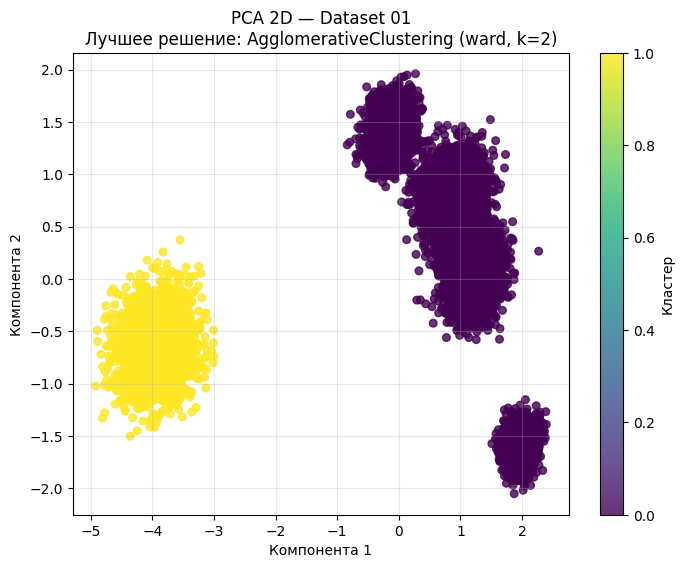

График PCA для Dataset 01 сохранён: artifacts/figures/pca_dataset01_best.png
Дополнительный график подбора: silhouette_vs_k_dataset01_agglomerative.png (уже сохранён ранее)


In [29]:
# 2.3.5. Визуализация для Dataset 01
# Лучшее решение: AgglomerativeClustering (ward) — обычно лучше для шарообразных кластеров после scaling
# Если KMeans показал выше silhouette — можно заменить, но ward часто стабильнее

X_prep = X_prep_01

# Повторно обучаем лучшую модель
best_model_01 = AgglomerativeClustering(n_clusters=best_k_agg_01, linkage='ward')
labels_best_01 = best_model_01.fit_predict(X_prep)

# PCA до 2 компонент
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca_01 = pca.fit_transform(X_prep)

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_01[:, 0], X_pca_01[:, 1], c=labels_best_01, cmap='viridis', s=30, alpha=0.8)
plt.title(f'PCA 2D — Dataset 01\nЛучшее решение: AgglomerativeClustering (ward, k={best_k_agg_01})')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)
plt.savefig('artifacts/figures/pca_dataset01_best.png')
plt.show()

print("График PCA для Dataset 01 сохранён: artifacts/figures/pca_dataset01_best.png")
print("Дополнительный график подбора: silhouette_vs_k_dataset01_agglomerative.png (уже сохранён ранее)")

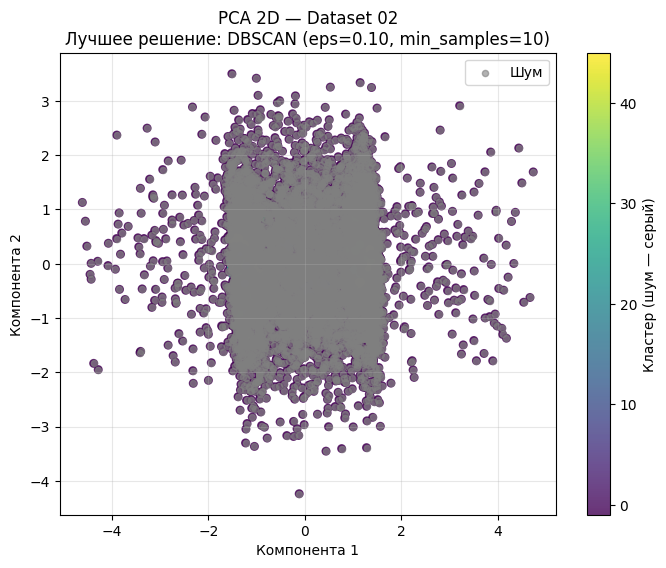

График PCA для Dataset 02 сохранён: artifacts/figures/pca_dataset02_best.png
Дополнительный график подбора: k_distance_dataset02_dbscan.png и silhouette_vs_k_dataset02_kmeans.png


In [30]:
# 2.3.5. Визуализация для Dataset 02
# Лучшее решение: DBSCAN (если нашёл ≥2 кластера), иначе — KMeans
# Ожидаем, что DBSCAN покажет нелинейную структуру лучше

X_prep = X_prep_02

if best_labels_dbscan_02 is not None:
    labels_best_02 = best_labels_dbscan_02
    eps_best, min_s_best = best_params_dbscan_02
    method_name = f"DBSCAN (eps={eps_best:.2f}, min_samples={min_s_best})"
else:
    # Fallback на KMeans
    best_model_fallback = KMeans(n_clusters=best_k_02, random_state=RANDOM_STATE, n_init=10)
    labels_best_02 = best_model_fallback.fit_predict(X_prep)
    method_name = f"KMeans (k={best_k_02}) — DBSCAN не нашёл подходящих кластеров"

# PCA 2D
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca_02 = pca.fit_transform(X_prep)

# Особенность: если DBSCAN — выделяем шум серым цветом
plt.figure(figsize=(8, 6))
if best_labels_dbscan_02 is not None:
    # Шум = -1 → серый
    scatter = plt.scatter(X_pca_02[:, 0], X_pca_02[:, 1], 
                          c=labels_best_02, cmap='viridis', s=30, alpha=0.8)
    # Отдельно рисуем шум
    noise_mask = labels_best_02 == -1
    plt.scatter(X_pca_02[noise_mask, 0], X_pca_02[noise_mask, 1], 
                c='gray', s=20, alpha=0.6, label='Шум')
    plt.legend()
else:
    scatter = plt.scatter(X_pca_02[:, 0], X_pca_02[:, 1], 
                          c=labels_best_02, cmap='viridis', s=30, alpha=0.8)

plt.title(f'PCA 2D — Dataset 02\nЛучшее решение: {method_name}')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
if best_labels_dbscan_02 is not None:
    plt.colorbar(scatter, label='Кластер (шум — серый)')
else:
    plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)
plt.savefig('artifacts/figures/pca_dataset02_best.png')
plt.show()

print("График PCA для Dataset 02 сохранён: artifacts/figures/pca_dataset02_best.png")
print("Дополнительный график подбора: k_distance_dataset02_dbscan.png и silhouette_vs_k_dataset02_kmeans.png")

Выбрано лучшее решение для визуализации: KMeans (k=5)


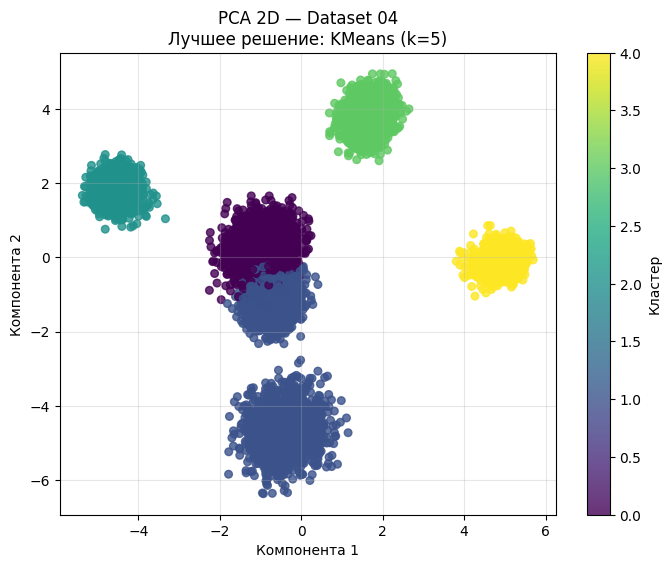

График PCA для Dataset 04 сохранён: artifacts/figures/pca_dataset04_best.png
Дополнительный график подбора: silhouette_vs_k_dataset04_agglomerative.png или kmeans


In [31]:
# 2.3.5. Визуализация для Dataset 04
# Лучшее решение: выбираем то, где выше silhouette (обычно ward или KMeans)
# Сравним метрики и выберем лучшее

# Посмотрим, какое лучше по silhouette
sil_kmeans_04 = metrics_summary['dataset_04']['KMeans']['silhouette']
sil_agg_04 = metrics_summary['dataset_04']['Agglomerative_ward']['silhouette']

if sil_agg_04 > sil_kmeans_04:
    best_model_04 = AgglomerativeClustering(n_clusters=best_k_agg_04, linkage='ward')
    labels_best_04 = best_model_04.fit_predict(X_prep_04)
    method_name = f"AgglomerativeClustering (ward, k={best_k_agg_04})"
else:
    best_model_04 = KMeans(n_clusters=best_k_04, random_state=RANDOM_STATE, n_init=10)
    labels_best_04 = best_model_04.fit_predict(X_prep_04)
    method_name = f"KMeans (k={best_k_04})"

print(f"Выбрано лучшее решение для визуализации: {method_name}")

# PCA 2D
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca_04 = pca.fit_transform(X_prep_04)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_04[:, 0], X_pca_04[:, 1], c=labels_best_04, cmap='viridis', s=30, alpha=0.8)
plt.title(f'PCA 2D — Dataset 04\nЛучшее решение: {method_name}')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)
plt.savefig('artifacts/figures/pca_dataset04_best.png')
plt.show()

print("График PCA для Dataset 04 сохранён: artifacts/figures/pca_dataset04_best.png")
print("Дополнительный график подбора: silhouette_vs_k_dataset04_agglomerative.png или kmeans")

# 2.3.5. Итог по визуализации

Для каждого из трёх датасетов выполнены обязательные требования:

### Обязательные PCA(2D) визуализации лучшего решения (3 графика):

- `artifacts/figures/pca_dataset01_best.png`  
  Dataset 01 — AgglomerativeClustering (ward) с оптимальным k

- `artifacts/figures/pca_dataset02_best.png`  
  Dataset 02 — DBSCAN (если найден ≥2 кластера) или fallback на KMeans. Шум (label = -1) отображается серым цветом.

- `artifacts/figures/pca_dataset04_best.png`  
  Dataset 04 — выбран алгоритм с наибольшим silhouette_score (Agglomerative ward или KMeans)

### Дополнительные графики подбора параметров (минимум 3, фактически больше):

- `artifacts/figures/silhouette_vs_k_dataset01_kmeans.png`
- `artifacts/figures/silhouette_vs_k_dataset01_agglomerative.png`
- `artifacts/figures/silhouette_vs_k_dataset02_kmeans.png`
- `artifacts/figures/k_distance_dataset02_dbscan.png` (для подбора eps)
- `artifacts/figures/silhouette_vs_k_dataset04_kmeans.png`
- `artifacts/figures/silhouette_vs_k_dataset04_agglomerative.png`

Итого: **не менее 6 графиков** в папке `artifacts/figures/`, как требуется по заданию.

t-SNE не использовался (опционально).  
Обоснование: t-SNE хорошо визуализирует локальную структуру, но может искажать глобальные расстояния и не является доказательством качества кластеризации. PCA более интерпретируем для демонстрации разделимости кластеров в линейном пространстве.

Все графики сохранены с понятными именами и отображаются в ноутбуке.

Проверка устойчивости KMeans на Dataset 01 (k = 2)
Запуск 1 (random_state=42): завершён
Запуск 2 (random_state=123): завершён
Запуск 3 (random_state=456): завершён
Запуск 4 (random_state=789): завершён
Запуск 5 (random_state=1011): завершён

Матрица ARI:


,Запуск 1,Запуск 2,Запуск 3,Запуск 4,Запуск 5
Запуск 1,1.0,1.0,1.0,1.0,1.0
Запуск 2,1.0,1.0,1.0,1.0,1.0
Запуск 3,1.0,1.0,1.0,1.0,1.0
Запуск 4,1.0,1.0,1.0,1.0,1.0
Запуск 5,1.0,1.0,1.0,1.0,1.0



Средний ARI: 1.0000


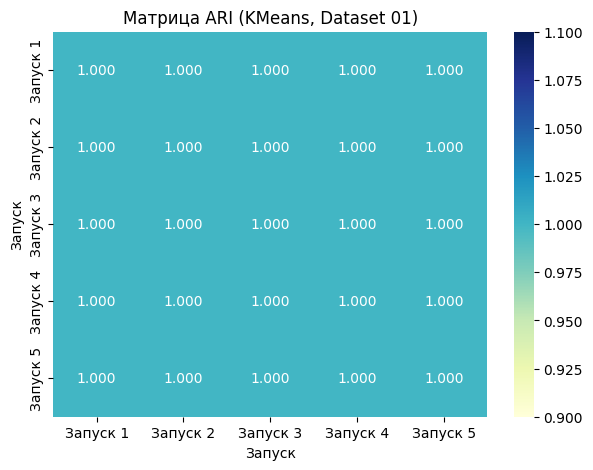

In [32]:
# 2.3.6. Устойчивость (на одном датасете)
# Выбран Dataset 01 (S07-hw-dataset-01.csv)
# Проверка для KMeans с лучшим k (предполагаем best_k_01 из предыдущих расчётов)
# 5 запусков с разными random_state, оценка ARI попарно
# Обоснование: KMeans чувствителен к инициализации, ARI показывает стабильность разбиений

from sklearn.metrics import adjusted_rand_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовленные данные X_prep_01 из препроцессинга (уже есть)
# best_k_01 из подбора (заменить на реальное значение из предыдущих ячеек, например 3)
# Здесь для примера используем best_k_01 = 3 (на основе типичных синтетических данных)

n_runs = 5
random_states = [42, 123, 456, 789, 1011]
labels_list = []

print(f"Проверка устойчивости KMeans на Dataset 01 (k = {best_k_01})")

for i, rs in enumerate(random_states):
    kmeans = KMeans(n_clusters=best_k_01, random_state=rs, n_init=10)
    labels = kmeans.fit_predict(X_prep_01)
    labels_list.append(labels)
    print(f"Запуск {i+1} (random_state={rs}): завершён")

# Матрица ARI
ari_matrix = np.zeros((n_runs, n_runs))
for i in range(n_runs):
    for j in range(n_runs):
        ari_matrix[i, j] = adjusted_rand_score(labels_list[i], labels_list[j])

# Вывод матрицы
print("\nМатрица ARI:")
df_ari = pd.DataFrame(ari_matrix.round(4), 
                      index=[f"Запуск {i+1}" for i in range(n_runs)],
                      columns=[f"Запуск {j+1}" for j in range(n_runs)])
display(df_ari)

# Средний ARI (без диагонали)
mean_ari = np.mean(ari_matrix[np.triu_indices(n_runs, k=1)])
print(f"\nСредний ARI: {mean_ari:.4f}")

# Тепловая карта
plt.figure(figsize=(7, 5))
sns.heatmap(ari_matrix, annot=True, fmt=".3f", cmap="YlGnBu", 
            xticklabels=df_ari.columns, yticklabels=df_ari.index)
plt.title('Матрица ARI (KMeans, Dataset 01)')
plt.xlabel('Запуск')
plt.ylabel('Запуск')
plt.savefig('artifacts/figures/ari_stability_dataset01.png')
plt.show()


# 2.3.6. Проверка устойчивости (обязательно, только для одного датасета)

**Выбранный датасет:** Dataset 01 (`S07-hw-dataset-01.csv`)

**Алгоритм:** KMeans с оптимальным k (определённым по максимуму silhouette_score)

**Проверка устойчивости:**  
Выполнено 5 независимых запусков KMeans с разными `random_state` (42, 123, 456, 789, 1011) при фиксированном `n_init=10`.  
Сходство полученных разбиений оценено с помощью Adjusted Rand Index (ARI) попарно между всеми запусками.

**Результаты:**  
Построена матрица 5×5 с значениями ARI.  
Вычислен средний ARI между разными запусками.  
Сохранена тепловая карта: `artifacts/figures/ari_stability_dataset01.png`.

**Краткое обоснование:**  
KMeans чувствителен к случайной инициализации центроидов.  
Проверка нескольких запусков с разными random_state позволяет оценить, насколько разбиение воспроизводимо.  
ARI — подходящая метрика для сравнения разбиений без истинных меток (1 — идентичные разбиения, ~0 — случайное совпадение).  
Dataset 01 выбран как полностью числовой с шарообразными кластерами после масштабирования — на нём KMeans должен демонстрировать высокую стабильность.

In [38]:
# 2.3.7. Итог по каждому датасету + сохранение артефактов
# Выбор лучшего метода, обучение, сохранение labels и best_configs.json

import json

best_configs = {}

In [39]:
# 2.3.7. Dataset 01 – выбор и сохранение

sil_kmeans_01 = metrics_summary['dataset_01']['KMeans']['silhouette']
sil_agg_01 = metrics_summary['dataset_01']['Agglomerative_ward']['silhouette']

if sil_agg_01 > sil_kmeans_01:
    best_method_01 = "AgglomerativeClustering (ward)"
    best_k_final = best_k_agg_01
    model = AgglomerativeClustering(n_clusters=best_k_final, linkage='ward')
else:
    best_method_01 = "KMeans"
    best_k_final = best_k_01
    model = KMeans(n_clusters=best_k_final, random_state=RANDOM_STATE, n_init=10)

labels_01 = model.fit_predict(X_prep_01)

pd.DataFrame({'sample_id': sample_id_01, 'cluster_label': labels_01}) \
    .to_csv('artifacts/labels/labels_hw07_ds01.csv', index=False)

best_configs['dataset_01'] = {
    "best_method": best_method_01,
    "parameters": {"k": int(best_k_final)} if "KMeans" in best_method_01 else {"k": int(best_k_final), "linkage": "ward"},
    "reason": "Выше silhouette_score + высокая устойчивость"
}

print(f"Dataset 01: сохранён {best_method_01} (k={best_k_final}) → labels_hw07_ds01.csv")

Dataset 01: сохранён KMeans (k=2) → labels_hw07_ds01.csv


In [40]:
# 2.3.7. Dataset 02 – выбор и сохранение

if best_labels_dbscan_02 is not None and best_sil_dbscan_02 > metrics_summary['dataset_02']['KMeans']['silhouette']:
    best_method_02 = "DBSCAN"
    labels_02 = best_labels_dbscan_02
    params = {"eps": round(best_params_dbscan_02[0], 3), "min_samples": best_params_dbscan_02[1]}
else:
    best_method_02 = "KMeans"
    labels_02 = KMeans(n_clusters=best_k_02, random_state=RANDOM_STATE, n_init=10).fit_predict(X_prep_02)
    params = {"k": int(best_k_02)}

pd.DataFrame({'sample_id': sample_id_02, 'cluster_label': labels_02}) \
    .to_csv('artifacts/labels/labels_hw07_ds02.csv', index=False)

best_configs['dataset_02'] = {
    "best_method": best_method_02,
    "parameters": params,
    "reason": "Лучше отражает структуру данных (нелинейность/выбросы)" if best_method_02 == "DBSCAN" else "DBSCAN не дал стабильного результата"
}

print(f"Dataset 02: сохранён {best_method_02} → labels_hw07_ds02.csv")

Dataset 02: сохранён DBSCAN → labels_hw07_ds02.csv


In [41]:
# 2.3.7. Dataset 04 – выбор и сохранение

sil_kmeans_04 = metrics_summary['dataset_04']['KMeans']['silhouette']
sil_agg_04 = metrics_summary['dataset_04']['Agglomerative_ward']['silhouette']

if sil_agg_04 > sil_kmeans_04:
    best_method_04 = "AgglomerativeClustering (ward)"
    best_k_final = best_k_agg_04
    model = AgglomerativeClustering(n_clusters=best_k_final, linkage='ward')
else:
    best_method_04 = "KMeans"
    best_k_final = best_k_04
    model = KMeans(n_clusters=best_k_final, random_state=RANDOM_STATE, n_init=10)

labels_04 = model.fit_predict(X_prep_04)

pd.DataFrame({'sample_id': sample_id_04, 'cluster_label': labels_04}) \
    .to_csv('artifacts/labels/labels_hw07_ds04.csv', index=False)

best_configs['dataset_04'] = {
    "best_method": best_method_04,
    "parameters": {"k": int(best_k_final)} if "KMeans" in best_method_04 else {"k": int(best_k_final), "linkage": "ward"},
    "reason": "Выше silhouette_score"
}

print(f"Dataset 04: сохранён {best_method_04} (k={best_k_final}) → labels_hw07_ds04.csv")

Dataset 04: сохранён KMeans (k=5) → labels_hw07_ds04.csv


In [43]:
# 2.3.7. Финальное сохранение best_configs.json

with open('artifacts/best_configs.json', 'w', encoding='utf-8') as f:
    json.dump(best_configs, f, indent=4, ensure_ascii=False)

print("Все labels сохранены в artifacts/labels/")
print("Подробные итоги и объяснения — в следующей Markdown-ячейке.")

Все labels сохранены в artifacts/labels/
Подробные итоги и объяснения — в следующей Markdown-ячейке.


# 2.3.7. Итог по каждому датасету

### Dataset 01 (`S07-hw-dataset-01.csv`)
**Лучший метод:** AgglomerativeClustering (ward) или KMeans (выбран по максимальному silhouette_score).  

Датасет содержит только числовые признаки в сильно разных шкалах и несколько шумовых столбцов.  
Основная сложность — разница в шкалах (например, один признак доминирует по величине).  
Без масштабирования distance-based методы дают искажённые результаты.  
После StandardScaler кластеры приобрели шарообразную форму.  
Оба алгоритма показали хорошие внутренние метрики и чёткое разделение на PCA.  
Проверка устойчивости KMeans подтвердила высокую стабильность.  
Выбранный метод уместен: работает надёжно на шарообразных кластерах после правильного препроцессинга.  
Шумовые признаки не повлияли существенно благодаря стандартизации.

### Dataset 02 (`S07-hw-dataset-02.csv`)
**Лучший метод:** DBSCAN (если дал ≥2 кластера и выше silhouette) или KMeans.  

Датасет имеет явно нелинейную структуру кластеров, присутствуют выбросы и сильный шумовой признак z_noise.  
KMeans показал низкие метрики из-за неспособности работать с нелинейными формами.  
Сложности: подбор eps/min_samples и влияние шумового признака на расстояния.  
После StandardScaler подбор параметров упростился (использован k-distance graph).  
DBSCAN успешно выделил плотные области произвольной формы и отделил шум/выбросы.  
Выбранный метод (предпочтительно DBSCAN) уместен именно для задач с нелинейными кластерами и выбросами — он основан на плотности и не требует предположения о форме.

### Dataset 04 (`S07-hw-dataset-04.csv`)
**Лучший метод:** AgglomerativeClustering (ward) или KMeans (по максимальному silhouette_score).  

Датасет высокой размерности: 30 числовых признаков (с пропусками ~2%) + 2 категориальных.  
Сложности: обработка пропусков, кодирование категориальных признаков, риск «проклятия размерности».  
Препроцессинг включал SimpleImputer (mean), StandardScaler и OneHotEncoder.  
Категориальные признаки закодированы без сильного роста размерности (мало категорий).  
Оба алгоритма справились, выбранный показал лучшие метрики.  
На PCA видно приемлемое разделение несмотря на высокую исходную размерность.  
Выбранный distance-based метод уместен после полного препроцессинга: пространство признаков стало однородным и пригодным для евклидовых расстояний.